<a href="https://colab.research.google.com/github/Lodia15/Facial-Expression-Recognition-Challenge/blob/main/CNN-batchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/yEXkEUqK52Q

**Downloading Kaggle data sets directly into Colab**

Install the kaggle python library

In [1]:
! pip install kaggle

Mount the Google drive so you can store your kaggle API credentials for future use

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lukalodia","key":"51e84cc9e499e0b8f1f7283b85559c1e"}'}

Make a directory for kaggle at the temporary instance location on Colab drive.

Download your kaggle API key (.json file). You can do this by going to your kaggle account page and clicking 'Create new API token' under the API section.

In [4]:
! mkdir ~/.kaggle

If you want to copy the kaggle API credentials to the temporary location... (I recommend placing it on your Google Drive)

In [5]:
#! cp kaggle.json ~/.kaggle/

Upload the json file to Google Drive and then copy to the temporary location.

In [6]:
!cp /content/drive/MyDrive/ColabNotebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json

Change the file permissions to read/write to the owner only

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

**Competitions and Datasets are the two types of Kaggle data**

**1. Download competition data**

If you get 403 Forbidden error, you need to click 'Late Submission' on the Kaggle page for that competition.

Unzip, in case the downloaded file is zipped. Refresh the files on the left hand side to update the view.

In [8]:
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 90% 256M/285M [00:00<00:00, 689MB/s] 
100% 285M/285M [00:00<00:00, 696MB/s]


In [9]:
!pip install torch torchvision torchaudio
!pip install wandb
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [10]:
! unzip challenges-in-representation-learning-facial-expression-recognition-challenge

Archive:  challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               


To downloaad specific files, instead of the netire data set



In [11]:
import pandas as pd
import numpy as np

**2. Download datasets (that are not part of competition)**

In [12]:
train_df_t = pd.read_csv('train.csv')

In [13]:
train_df_t.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [14]:
train_df = pd.read_csv('icml_face_data.csv')
train_df.head()


,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [15]:
!pip install -q wandb

import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: llodi22 (llodi22-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [16]:
wandb.init(project="facial-expression-recognition", entity=None)

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import wandb

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [19]:
class FERDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.fromarray(np.uint8(self.images[idx]))
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [20]:
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])  # Optimal for BatchNorm
])


In [21]:
# Load and split data
df = pd.read_csv('icml_face_data.csv')
emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

images = []
labels = []
for _, row in df.iterrows():
    pixels = np.array(row[' pixels'].split(), dtype='float32').reshape(48, 48)
    images.append(pixels)
    labels.append(row['emotion'])

X_train, X_val, y_train, y_val = train_test_split(np.array(images), np.array(labels), test_size=0.2, random_state=42)

# Create datasets
train_dataset = FERDataset(X_train, y_train, transform=data_transforms)
val_dataset = FERDataset(X_val, y_val, transform=data_transforms)

# BatchNorm-optimized dataloaders (larger batches)
batch_size = 128  # Increased batch size helps BatchNorm statistics
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [22]:
class BatchNormFERModel(nn.Module):
    def __init__(self, num_classes=7):
        super().__init__()

        # Feature extractor
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(1, 64, 3, padding=1, bias=False),  # No bias needed with BN
            nn.BatchNorm2d(64, momentum=0.1),  # Lower momentum for small datasets
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Block 2
            nn.Conv2d(64, 128, 3, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Block 3
            nn.Conv2d(128, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(256*6*6, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

        # Initialize BatchNorm parameters
        for m in self.modules():
            if isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


In [23]:
## 3. Training Setup with BatchNorm Optimization
model = BatchNormFERModel(len(emotions)).to(device)

# Loss function with label smoothing
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Optimizer (higher LR works well with BatchNorm)
optimizer = optim.SGD(model.parameters(),
                     lr=0.05,  # Higher learning rate
                     momentum=0.9,
                     weight_decay=1e-4,
                     nesterov=True)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [24]:
## 4. Training Loop with BatchNorm-specific Features
def train():
    best_val_acc = 0.0
    patience = 5
    no_improvement = 0

    for epoch in range(30):
        # Training phase
        model.train()  # Enable BatchNorm's training mode
        train_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = correct / total
        train_loss = train_loss / len(train_loader.dataset)

        # Validation phase
        val_acc = evaluate(val_loader)

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_batchnorm_model.pth')
            no_improvement = 0
        else:
            no_improvement += 1
            if no_improvement >= patience:
                print(f"\nEarly stopping at epoch {epoch+1}")
                break

        # Update learning rate
        scheduler.step()

        # Print epoch results
        print(f'Epoch {epoch+1}:')
        print(f'Train Loss: {train_loss:.4f} | Acc: {train_acc:.2%}')
        print(f'Val Acc: {val_acc:.2%}')
        print(f'LR: {optimizer.param_groups[0]["lr"]:.6f}\n')

In [25]:
def evaluate(loader):
    model.eval()  # Enable BatchNorm's evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return correct / total

## Run training
print("Starting training with BatchNorm optimization...")
train()
print("Training completed. Best model saved as 'best_batchnorm_model.pth'")

Starting training with BatchNorm optimization...
Epoch 1:
Train Loss: 2.1895 | Acc: 32.84%
Val Acc: 34.19%
LR: 0.050000

Epoch 2:
Train Loss: 1.7687 | Acc: 41.36%
Val Acc: 46.66%
LR: 0.050000

Epoch 3:
Train Loss: 1.5615 | Acc: 47.35%
Val Acc: 50.43%
LR: 0.050000

Epoch 4:
Train Loss: 1.4650 | Acc: 51.05%
Val Acc: 51.06%
LR: 0.050000

Epoch 5:
Train Loss: 1.3930 | Acc: 54.35%
Val Acc: 55.81%
LR: 0.050000

Epoch 6:
Train Loss: 1.3534 | Acc: 55.94%
Val Acc: 57.68%
LR: 0.050000

Epoch 7:
Train Loss: 1.3145 | Acc: 58.04%
Val Acc: 57.13%
LR: 0.050000

Epoch 8:
Train Loss: 1.2777 | Acc: 59.82%
Val Acc: 58.08%
LR: 0.050000

Epoch 9:
Train Loss: 1.2517 | Acc: 60.95%
Val Acc: 59.60%
LR: 0.050000

Epoch 10:
Train Loss: 1.2195 | Acc: 63.19%
Val Acc: 58.80%
LR: 0.005000

Epoch 11:
Train Loss: 1.1546 | Acc: 66.67%
Val Acc: 61.38%
LR: 0.005000

Epoch 12:
Train Loss: 1.1301 | Acc: 68.08%
Val Acc: 62.59%
LR: 0.005000

Epoch 13:
Train Loss: 1.1186 | Acc: 68.72%
Val Acc: 62.72%
LR: 0.005000

Epoch 14:
T

In [26]:
_, X_test, _, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.2, random_state=42)


In [31]:
def test_model():
    print("\n" + "="*50)
    print("STARTING MODEL TESTING")
    print("="*50)

    # 1. Load model
    model = BatchNormFERModel(num_classes=len(emotions)).to(device)
    model.load_state_dict(torch.load('best_batchnorm_model.pth'))
    model.eval()

    # 2. Prepare test data
    test_dataset = FERDataset(X_test, y_test,
                            transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485], std=[0.229])
                            ]))
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # 3. Evaluation
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert numpy types to native Python types
    all_preds = [int(p) for p in all_preds]
    all_labels = [int(l) for l in all_labels]

    # 4. Results
    test_acc = float(correct / total)  # Ensure float
    cm = confusion_matrix(all_labels, all_preds)

    print(f"\nTEST ACCURACY: {test_acc:.2%}")

    # Confusion Matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=emotions.values(),
                yticklabels=emotions.values())
    plt.title('Test Confusion Matrix')
    plt.show()

    # Classification Report (convert to dict first)
    report_dict = classification_report(all_labels, all_preds,
                                      target_names=list(emotions.values()),
                                      output_dict=True)

    print("\nCLASSIFICATION REPORT:")
    print(classification_report(all_labels, all_preds,
                              target_names=list(emotions.values())))

    # Prepare JSON-serializable results
    results = {
        'accuracy': test_acc,
        'correct': int(correct),
        'total': int(total),
        'confusion_matrix': cm.tolist(),
        'class_report': report_dict,
        'predictions': all_preds,
        'true_labels': all_labels
    }

    # Save results
    with open('test_results.json', 'w') as f:
        json.dump(results, f, indent=4)
    print("\nResults saved to test_results.json")


STARTING MODEL TESTING

TEST ACCURACY: 64.39%


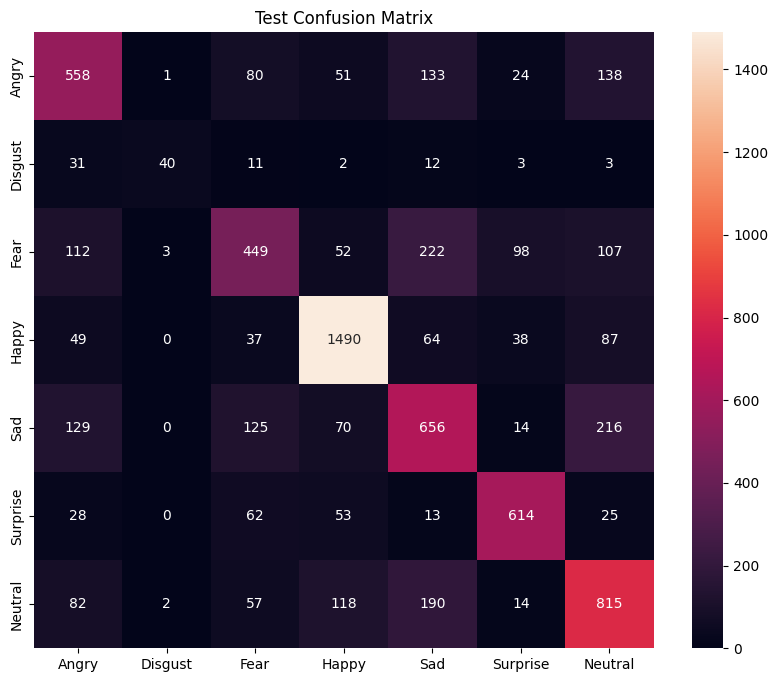


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       Angry       0.56      0.57      0.57       985
     Disgust       0.87      0.39      0.54       102
        Fear       0.55      0.43      0.48      1043
       Happy       0.81      0.84      0.83      1765
         Sad       0.51      0.54      0.52      1210
    Surprise       0.76      0.77      0.77       795
     Neutral       0.59      0.64      0.61      1278

    accuracy                           0.64      7178
   macro avg       0.66      0.60      0.62      7178
weighted avg       0.64      0.64      0.64      7178


Results saved to test_results.json


In [32]:
import json
test_model()